<a href="https://colab.research.google.com/github/ThomasDarrieumerlou/Forecasting-project/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [31]:
atlanta_data = pd.read_excel('Atlanta.xlsx')
#atlanta_data = df[df['City, State'] == 'Atlanta, GA']

# Afficher les données liées à Atlanta
atlanta_data

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975,41.080000,"Atlanta, GA",490584,8033,185,443,3518,3887
1,1976,40.742500,"Atlanta, GA",457300,7529,154,477,3518,3380
2,1977,42.482500,"Atlanta, GA",440300,7595,138,510,3593,3354
3,1978,45.897500,"Atlanta, GA",456000,8845,144,592,3990,4119
4,1979,50.840000,"Atlanta, GA",423103,10715,231,656,4639,5189
5,1980,56.942500,"Atlanta, GA",422474,11075,201,671,5470,4733
6,1981,61.112500,"Atlanta, GA",435626,10608,181,644,5246,4537
7,1982,64.932500,"Atlanta, GA",441103,10486,152,613,5722,3999
8,1983,67.547500,"Atlanta, GA",448635,9326,141,619,5014,3552
9,1984,71.657500,"Atlanta, GA",442951,10525,135,632,5729,4029


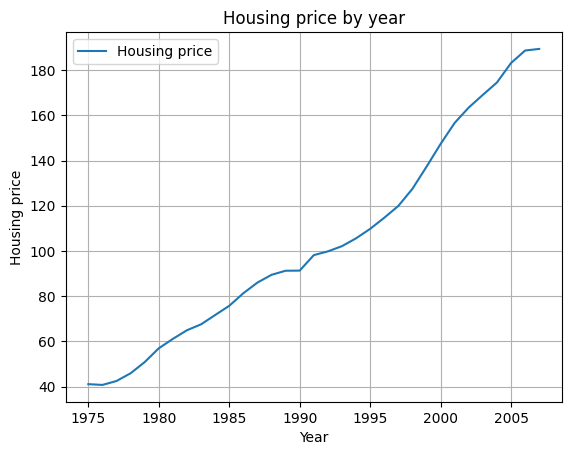

In [32]:
atlanta_data.plot(x='Year', y='index_nsa', label='Housing price')

plt.title('Housing price by year')
plt.xlabel('Year')
plt.ylabel('Housing price')
plt.legend()
plt.grid()
plt.show()

In [33]:
ad_fuller_result = adfuller(atlanta_data['index_nsa'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.09023814908409691
p-value: 0.9653882526277717


In [34]:
index_diff = np.diff(atlanta_data['index_nsa'], n=1)

ad_fuller_result = adfuller(index_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.922476158457606
p-value: 0.04279606123742532


In [35]:
index_diff2 = np.diff(index_diff, n=1)

ad_fuller_result = adfuller(index_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.787102014491045
p-value: 4.970025729795092e-07


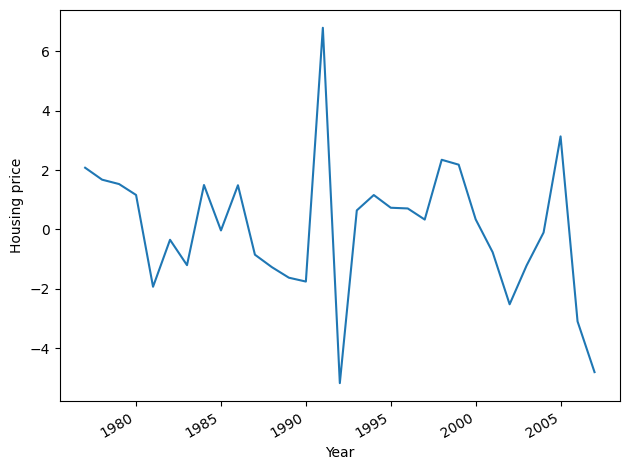

In [36]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')

fig.autofmt_xdate()
plt.tight_layout()

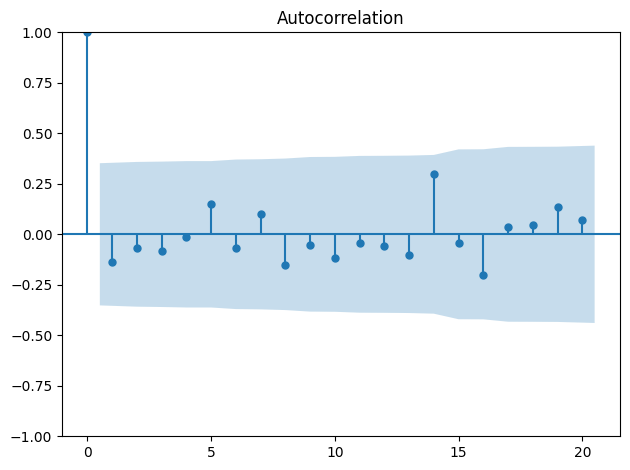

In [37]:
plot_acf(index_diff2, lags=20);
plt.tight_layout()

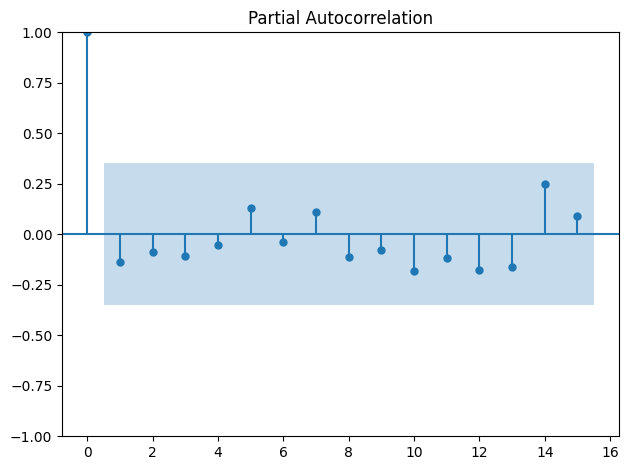

In [39]:
plot_pacf(index_diff2, lags=15);
plt.tight_layout()

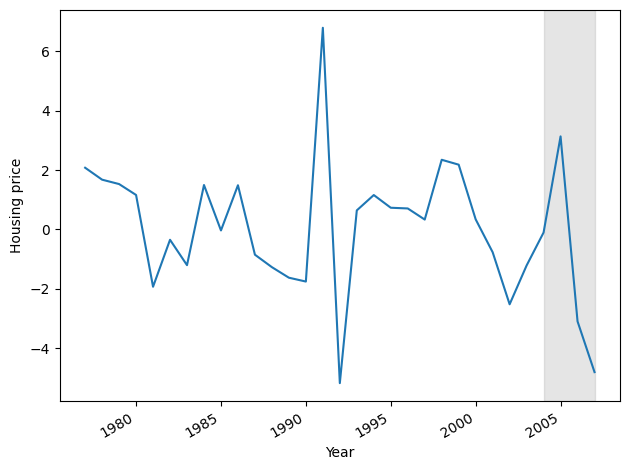

In [42]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')
ax.axvspan(2004, 2007, color='#808080', alpha=0.2)


fig.autofmt_xdate()
plt.tight_layout()

In [43]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [57]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 1

order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [58]:
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [59]:
train = atlanta_data['index_nsa'][:-4]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(1, 0)",126.209788,128.874197
1,"(2, 0)",127.272718,131.269332
2,"(1, 1)",127.356346,131.352960
3,"(3, 0)",129.226155,134.554973
4,"(2, 1)",129.227898,134.556716
5,"(1, 2)",129.273160,134.601978
6,"(1, 3)",130.930938,137.591961
7,"(2, 2)",131.033506,137.694528
8,"(3, 1)",131.222972,137.883994
9,"(3, 2)",132.326765,140.319992


In [60]:
model = SARIMAX(train, order=(1,1,0), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              index_nsa   No. Observations:                   29
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -61.105
Date:                Thu, 28 Mar 2024   AIC                            126.210
Time:                        21:04:20   BIC                            128.874
Sample:                             0   HQIC                           127.024
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9077      0.080     11.321      0.000       0.751       1.065
sigma2         4.3263      0.790      5.476      0.000       2.778       5.875
Ljung-Box (L1) (Q):                   1.86   Jarque-

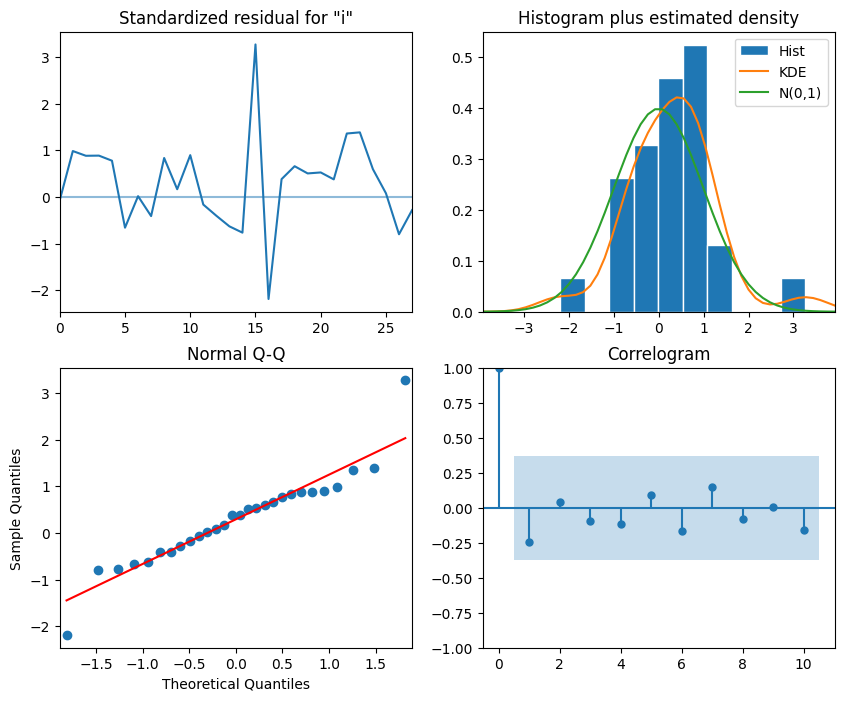

In [61]:
model_fit.plot_diagnostics(figsize=(10,8));

In [62]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,0.053422,0.817212
2,0.085925,0.957947
3,0.095767,0.992340
4,0.105173,0.998665
5,0.130715,0.999686
6,0.274582,0.999611
7,0.277906,0.999923
8,0.371391,0.999957
9,0.388036,0.999990
10,0.416520,0.999997


In [63]:
test = atlanta_data.iloc[-4:]

test['naive_seasonal'] = atlanta_data['index_nsa'].iloc[28:32].values
test

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,naive_seasonal
29,2004,174.532500,"Atlanta, GA",430066,7921,111,267,4427,3116,169.050625
30,2005,183.147500,"Atlanta, GA",430666,7213,90,223,4039,2861,174.532500
31,2006,188.663125,"Atlanta, GA",485804,7548,110,171,4308,2959,183.147500
32,2007,189.370000,"Atlanta, GA",497290,8075,129,148,4221,3577,188.663125


In [64]:
ARIMA_pred = model_fit.get_prediction(28, 32).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,naive_seasonal,ARIMA_pred
29,2004,174.532500,"Atlanta, GA",430066,7921,111,267,4427,3116,169.050625,174.122050
30,2005,183.147500,"Atlanta, GA",430666,7213,90,223,4039,2861,174.532500,178.725582
31,2006,188.663125,"Atlanta, GA",485804,7548,110,171,4308,2959,183.147500,182.904387
32,2007,189.370000,"Atlanta, GA",497290,8075,129,148,4221,3577,188.663125,186.697653


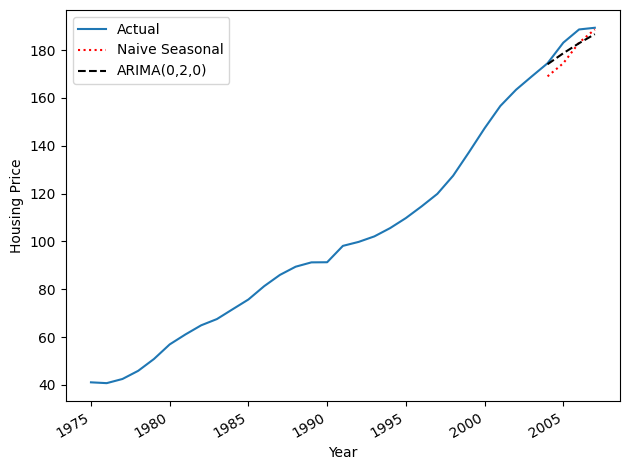

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'], atlanta_data['index_nsa'], label='Actual')
ax.plot(test['Year'], test['naive_seasonal'], 'r:', label='Naive Seasonal')
ax.plot(test['Year'], test['ARIMA_pred'], 'k--', label='ARIMA(0,2,0)')

ax.set_xlabel('Year')
ax.set_ylabel('Housing Price')

ax.legend(loc='upper left')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()



In [66]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_naive_seasonal = mape(test['index_nsa'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['index_nsa'], test['ARIMA_pred'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')

MAPE Naive: 2.79 %
MAPE ARIMA: 1.78 %


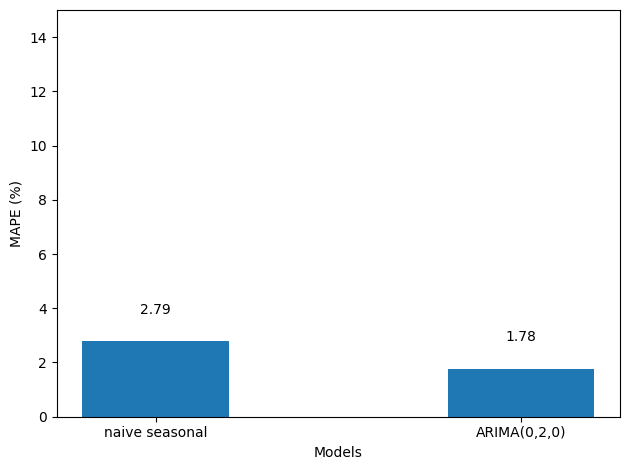

In [67]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(1,1,0)']
y = [mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

==================================================

In [116]:
def optimize_VARMAX(training_data, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = VARMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [120]:
from statsmodels.tsa.statespace.varmax import VARMAX

train_multi = atlanta_data[:-4]
train_multi_array = np.asarray(train_multi)

#result_df = optimize_VARMAX(train, order_list, d)

model_varmax = VARMAX(train_multi_array, order=(1, 1), simple_differencing=False)
model_varmax_fit = model.fit(disp=False)

# model_varmax = VARMAX(train, order=(1, 1))
# model_varmax_fit = model_varmax.fit(disp=True)

# Get VARMAX predictions
varmax_pred = model_varmax_fit.forecast(steps=len(test), exog=test)

# Add VARMAX predictions to the test DataFrame
test['VARMAX_pred'] = varmax_pred.iloc[:, 0]

# Plot actual vs VARMAX predictions
fig, ax = plt.subplots()
ax.plot(atlanta_data['Year'], atlanta_data['index_nsa'], label='Actual')
ax.plot(test['Year'], test['VARMAX_pred'], 'g--', label='VARMAX')
ax.set_xlabel('Year')
ax.set_ylabel('Housing Price')
ax.legend(loc='upper left')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Calculate MAPE for VARMAX predictions
mape_VARMAX = mape(test['index_nsa'], test['VARMAX_pred']) * 100
print('MAPE VARMAX:', "%.2f" % mape_VARMAX, '%')

# Plot MAPE comparison
fig, ax = plt.subplots()
x = ['naive seasonal', 'ARIMA(0,2,0)', 'VARMAX']
y = [mape_naive_seasonal, mape_ARIMA, mape_VARMAX]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 25)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value, 2)), ha='center')
plt.tight_layout()


ValueError: Only gave one variable to VAR

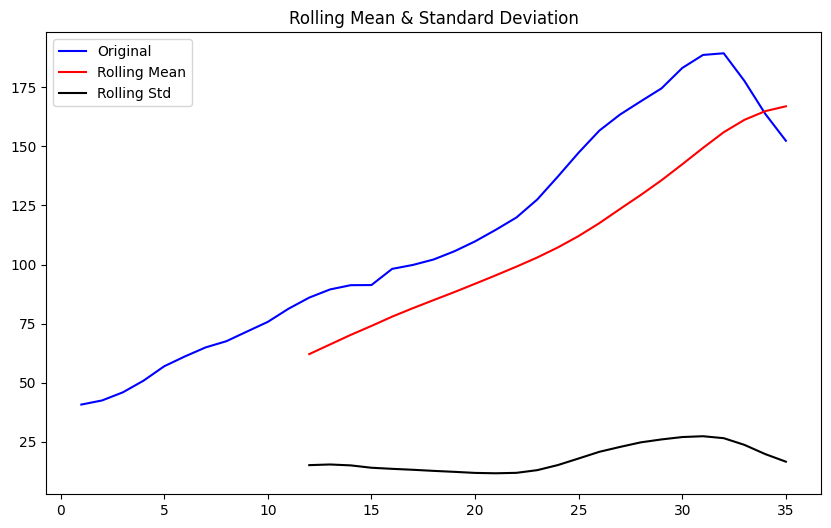

Résultats du test de Dickey-Fuller :
Test Statistic                  0.205506
p-value                         0.972569
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64
[[140.7875216  152.36375   ]
 [129.3888995  140.7875216 ]
 [118.45334036 129.3888995 ]
 [108.22941584 118.45334036]
 [ 98.92543999 108.22941584]]


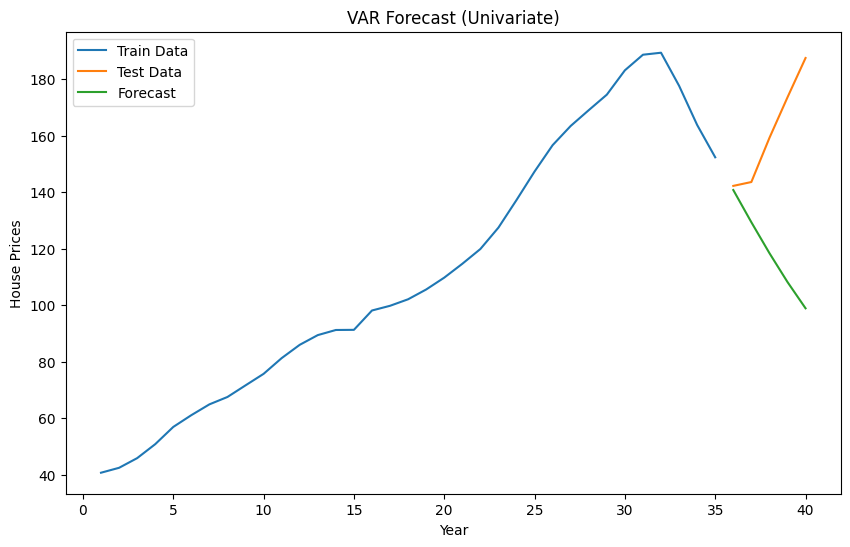

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

# Charger les données
data = pd.read_excel('Atlanta.xlsx')

# Sélectionner uniquement les colonnes 'Year' et 'index_nsa'
data = data[['Year', 'index_nsa']]
price = data[['index_nsa']]

# Convertir la colonne 'Year' en datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Définir la colonne 'Year' comme index
data.set_index('Year', inplace=True)

# Séparation des données en ensembles d'entraînement et de test
train = price.iloc[:-5] # Utiliser toutes les données sauf les 5 dernières pour l'entraînement
test = price.iloc[-5:] # Utiliser les 5 dernières données pour les tests

# Créer une DataFrame avec une seule colonne
train_multi = train.copy()
train_multi['index_nsa_lag1'] = train['index_nsa'].shift(1)  # Ajouter une variable lag

# Supprimer les lignes avec des valeurs manquantes
train_multi.dropna(inplace=True)

# Vérifier la stationnarité de la série temporelle
def test_stationarity(timeseries):
    # Calcul de la statistique de la moyenne mobile
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Tracé de la statistique de la moyenne mobile
    plt.figure(figsize=(10, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Test Dickey-Fuller
    print('Résultats du test de Dickey-Fuller :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(train_multi['index_nsa'])

# Ajustement du modèle VAR (univarié)
model = VAR(train_multi)
results = model.fit()

# Faire des prévisions
forecast = results.forecast(train_multi.values, steps=len(test)) # Prévoir sur la longueur des données de test

# Afficher les prévisions
print(forecast)

# Tracer les prévisions par rapport aux données de test
plt.figure(figsize=(10, 6))
plt.plot(train_multi.index, train_multi['index_nsa'], label='Train Data')
plt.plot(test.index, test['index_nsa'], label='Test Data')
plt.plot(test.index, forecast[:,0], label='Forecast')
plt.xlabel('Year')
plt.ylabel('House Prices')
plt.title('VAR Forecast')
plt.legend()
plt.show()
